In [1]:
from google.colab import files
uploaded=files.upload()

Saving mobile_battery_usage_dataset.csv to mobile_battery_usage_dataset.csv


In [2]:
# ---------------------------------------------------------
# STEP 1: Import required libraries
# ---------------------------------------------------------

import pandas as pd                      # For dataset handling
import numpy as np                       # For numerical operations
import matplotlib.pyplot as plt          # For visualization
from tabulate import tabulate

from sklearn.model_selection import train_test_split  # Used to split data into training and testing

from sklearn.linear_model import LinearRegression  # Linear Regression is a Supervised Learning algorithm

from sklearn.metrics import mean_squared_error  # Used to calculate prediction error

In [3]:
# ---------------------------------------------------------
# STEP 2: Load the dataset (Battery Usage Dataset)
# ---------------------------------------------------------

df = pd.read_csv("mobile_battery_usage_dataset.csv")  # Reads the CSV dataset

pd.set_option('display.expand_frame_repr', False)

print(
    tabulate(
        df.head(15),
        headers="keys",
        tablefmt="grid",
        showindex=True,
        colalign=("center",) * (len(df.columns) + 1)  # +1 is for index column
    )
)

+----+-----------+------------------------+-------------------+--------------------------+--------------------+----------------------+----------------------+------------------+
|    |  User_ID  |  Screen_On_Time_Hours  |  App_Usage_Hours  |  Charging_Count_Per_Day  |  Battery_Health_%  |  Brightness_Level_%  |  Battery_Consumed_%  |  Battery_Status  |
+====+===========+========================+===================+==========================+====================+======================+======================+==================+
| 0  |     1     |          8.7           |        8.7        |            2             |         75         |          88          |         78.4         |   Medium Usage   |
+----+-----------+------------------------+-------------------+--------------------------+--------------------+----------------------+----------------------+------------------+
| 1  |     2     |          9.6           |        3.5        |            2             |         81         |    

In [4]:
# ---------------------------------------------------------
# STEP 3: Select Features (Input) and Target (Output)
# ---------------------------------------------------------

# Input features (X)
X = df[[
    "Screen_On_Time_Hours",
    "App_Usage_Hours",
    "Brightness_Level_%"
]]

# Target variable (y)
y = df["Battery_Consumed_%"]

print("\nInput Features (X):")
print(X.head())

print("\nTarget Output (y):")
print(y.head())


Input Features (X):
   Screen_On_Time_Hours  App_Usage_Hours  Brightness_Level_%
0                   8.7              8.7                  88
1                   9.6              3.5                  47
2                   2.3             10.0                  51
3                   3.6              2.6                  80
4                   8.3              3.0                  50

Target Output (y):
0    78.4
1    63.2
2    46.6
3    33.8
4    55.5
Name: Battery_Consumed_%, dtype: float64


In [5]:
# ---------------------------------------------------------
# STEP 4: Split data into Training and Testing
# ---------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 80% training data
# 20% testing data

print("\nTraining data size:", X_train.shape)
print("Testing data size :", X_test.shape)


Training data size: (400, 3)
Testing data size : (100, 3)


In [6]:
# ---------------------------------------------------------
# STEP 5: Create the Linear Regression model
# ---------------------------------------------------------

model = LinearRegression()  # Creating the model object

In [7]:
# ---------------------------------------------------------
# STEP 6: Train the model (Supervised Learning)
# ---------------------------------------------------------

model.fit(X_train, y_train)  # Model learns relationship between input and output

LinearRegression()

In [8]:
# ---------------------------------------------------------
# STEP 7: Predict Battery Consumption
# ---------------------------------------------------------

y_pred = model.predict(X_test)  # Predict battery consumption for test data

print("\nPredicted Battery Consumption:")
print(y_pred[:5])


Predicted Battery Consumption:
[54.9 51.7 64.8 38.1 28.6]


In [9]:
# ---------------------------------------------------------
# STEP 8: Evaluate the model
# ---------------------------------------------------------

mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error

print("\nMean Squared Error:", mse)
print("Mean Squared Error (rounded):", round(mse, 2))


Mean Squared Error: 3.905177025206097e-28
Mean Squared Error (rounded): 0.0


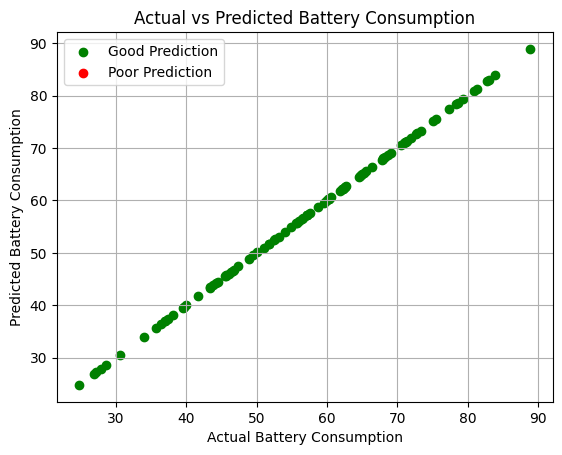

In [10]:
# ---------------------------------------------------------
# STEP 9: Visualization (Optional but useful)
# ---------------------------------------------------------

error = abs(y_test - y_pred)

plt.scatter(y_test[error < 5], y_pred[error < 5], color='green', label="Good Prediction")
plt.scatter(y_test[error >= 5], y_pred[error >= 5], color='red', label="Poor Prediction")
plt.grid(True)
plt.xlabel("Actual Battery Consumption")
plt.ylabel("Predicted Battery Consumption")
plt.title("Actual vs Predicted Battery Consumption")
plt.legend()
plt.show()


In [11]:
# ---------------------------------------------------------
# STEP 10: Custom User Input Prediction
# ---------------------------------------------------------

# Taking custom input
custom_input = np.array([[5.0, 6.0, 70]])
# [Screen_On_Time_Hours, App_Usage_Hours, Brightness_Level_%]

custom_prediction = model.predict(custom_input)

print("\nPredicted Battery Consumption for custom input:")
print(custom_prediction[0])



Predicted Battery Consumption for custom input:
49.99999999999999


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
